In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
%matplotlib inline

train = pd.read_csv('titanic_train.csv')

In [2]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


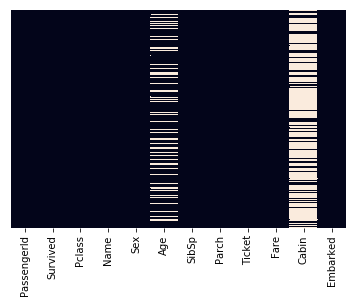

In [3]:
sns.heatmap(train.isnull(),yticklabels = False,cbar = False)

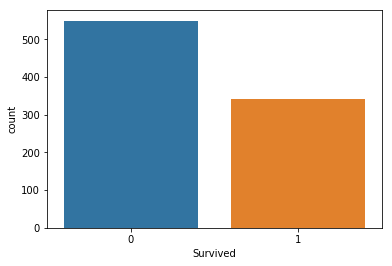

In [4]:
sns.countplot(x='Survived',data = train)

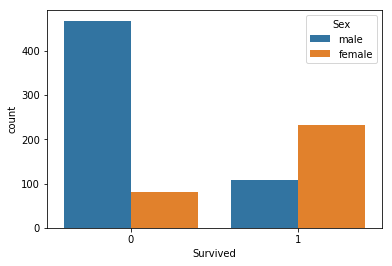

In [5]:
sns.countplot(x='Survived',data = train,hue = 'Sex')

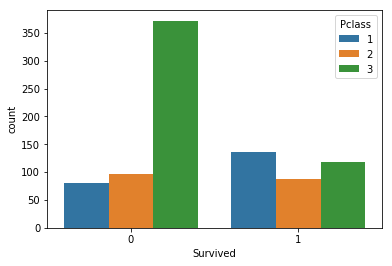

In [6]:
sns.countplot(x='Survived',hue='Pclass',data = train)

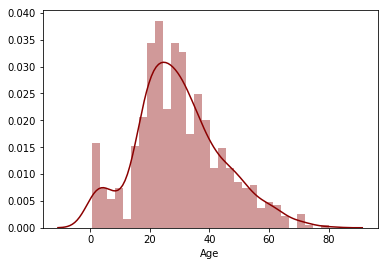

In [7]:
sns.distplot(train['Age'].dropna(),bins=30,color='darkred')

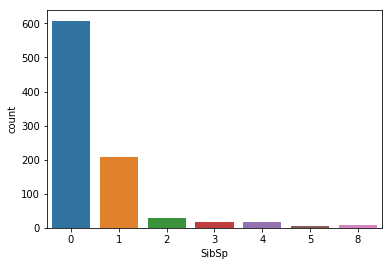

In [8]:
sns.countplot(x='SibSp',data = train)

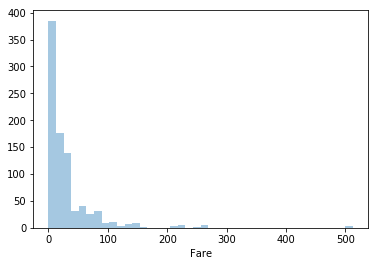

In [9]:
sns.distplot(train['Fare'],kde = False,bins = 40)

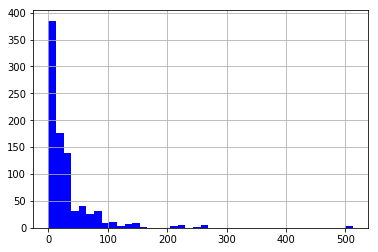

In [10]:
train['Fare'].hist(color='blue',bins=40)

In [11]:
import cufflinks as cf
cf.go_offline()

In [12]:
train['Fare'].iplot(kind='hist',bins = 30,color='blue')

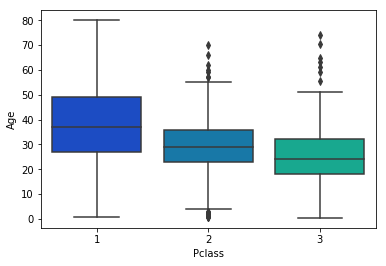

In [13]:

sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

In [14]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass ==2:
            return 29
        else:
            return 24
    else:
        return Age

In [15]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis = 1)

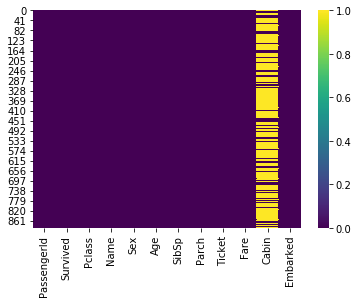

In [16]:
sns.heatmap(train.isnull(),cmap='viridis')

In [17]:
train.drop('Cabin',axis =1,inplace=True)

In [18]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


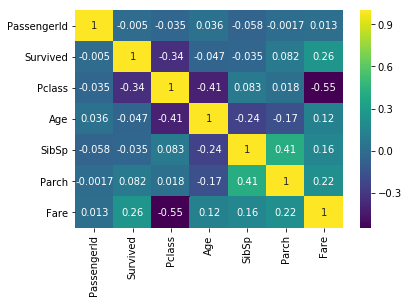

In [19]:
sns.heatmap(train.corr(),cmap='viridis',annot = True)

In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 76.6+ KB


In [21]:
sex = pd.get_dummies(train['Sex'],drop_first=True)

In [22]:
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [23]:
embark = pd.get_dummies(train['Embarked'],drop_first = True)

In [24]:
pclass = pd.get_dummies(train['Pclass'],drop_first = True)

In [25]:
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [26]:
pclass.head()

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [27]:
train = pd.concat([train,sex,embark,pclass],axis = 1)

In [28]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1,0,1
5,6,0,3,"Moran, Mr. James",male,24.0,0,0,330877,8.4583,Q,1,1,0,0,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S,1,0,1,0,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S,1,0,1,0,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S,0,0,1,0,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C,0,0,0,1,0


In [29]:
train.drop(['PassengerId','Sex','Name','Ticket','Pclass','Embarked'],axis =1,inplace = True)

In [30]:
train.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1


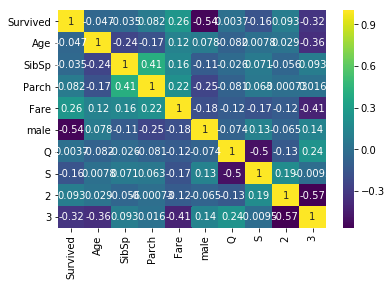

In [33]:
sns.heatmap(train.corr(),cmap='viridis',annot=True)

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1), 
                                                    train['Survived'], test_size=0.30, 
                                                    random_state=101)

In [36]:
from sklearn.linear_model import LogisticRegression

In [38]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\Users\sambi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [39]:
predictions = logmodel.predict(X_test)

In [40]:
from sklearn.metrics import classification_report

In [42]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.78      0.90      0.83       154
           1       0.82      0.65      0.73       114

   micro avg       0.79      0.79      0.79       268
   macro avg       0.80      0.77      0.78       268
weighted avg       0.80      0.79      0.79       268



In [43]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [45]:
rfc_pred = rfc.predict(X_test)

In [46]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83       154
           1       0.80      0.72      0.76       114

   micro avg       0.80      0.80      0.80       268
   macro avg       0.80      0.79      0.79       268
weighted avg       0.80      0.80      0.80       268



In [47]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
predictions = dtree.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.76      0.86      0.81       154
           1       0.77      0.62      0.69       114

   micro avg       0.76      0.76      0.76       268
   macro avg       0.76      0.74      0.75       268
weighted avg       0.76      0.76      0.76       268

